<a href="https://www.kaggle.com/code/lalit7881/predicting-hit-songs-on-itunes?scriptVersionId=300009194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itunes-music-dataset/itunes_music_dataset.csv


## Import dataset

In [2]:
file_path = "/kaggle/input/itunes-music-dataset/itunes_music_dataset.csv"
df = pd.read_csv(file_path)

df.head()

,track_id,track_name,artist_name,collection_name,album_artist,genre,rating,track_price,collection_price,release_date,track_time_millis,country,currency,preview_url,artwork_url
0,1624932774,POP!,NAYEON,IM NAYEON,NaN,Dance,Clean,1.29,6.99,2022-06-24T12:00:00Z,168107,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
1,1022164261,Riptide,Vance Joy,Dream Your Life Away (Special Edition),NaN,Alternative,Clean,1.29,9.99,2013-03-22T07:00:00Z,202019,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
2,1207120448,Something Just Like This,The Chainsmokers & Coldplay,Memories...Do Not Open,The Chainsmokers,Dance,Clean,1.29,9.99,2017-02-22T08:00:00Z,247165,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
3,1369380479,lovely,Billie Eilish & Khalid,lovely - Single,NaN,Pop,Clean,1.29,1.29,2018-04-19T12:00:00Z,200187,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
4,1450695872,when the party's over,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",NaN,Alternative,Clean,1.29,10.99,2018-10-17T07:00:00Z,196077,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...


In [3]:
# Shape of dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# Data types & null info
df.info()

# Statistical summary
df.describe()

# Include categorical summary
df.describe(include='object')

Shape: (4915, 15)
Columns: Index(['track_id', 'track_name', 'artist_name', 'collection_name',
       'album_artist', 'genre', 'rating', 'track_price', 'collection_price',
       'release_date', 'track_time_millis', 'country', 'currency',
       'preview_url', 'artwork_url'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           4915 non-null   int64  
 1   track_name         4915 non-null   object 
 2   artist_name        4913 non-null   object 
 3   collection_name    4915 non-null   object 
 4   album_artist       1728 non-null   object 
 5   genre              4915 non-null   object 
 6   rating             4915 non-null   object 
 7   track_price        4540 non-null   float64
 8   collection_price   4539 non-null   float64
 9   release_date       4867 non-null   object 
 10  track_time_mil

,track_name,artist_name,collection_name,album_artist,genre,rating,release_date,country,currency,preview_url,artwork_url
count,4915,4913,4915,1728,4915,4915,4867,4915,4915,4914,4915
unique,4184,2347,2810,406,97,1,2696,1,1,4914,2966
top,Focus,Taylor Swift,Top Hits 2024,Various Artists,Bollywood,Clean,2020-07-20T07:00:00Z,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
freq,64,105,45,581,961,4915,33,4915,4915,1,34


In [4]:
# Total missing values
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

track_id              0.000000
track_name            0.000000
artist_name           0.040692
collection_name       0.000000
album_artist         64.842319
genre                 0.000000
rating                0.000000
track_price           7.629705
collection_price      7.650051
release_date          0.976602
track_time_millis     0.000000
country               0.000000
currency              0.000000
preview_url           0.020346
artwork_url           0.000000
dtype: float64

In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,track_id,track_name,artist_name,collection_name,album_artist,genre,rating,track_price,collection_price,release_date,track_time_millis,country,currency,preview_url,artwork_url
0,1624932774,POP!,NAYEON,IM NAYEON,Various Artists,Dance,Clean,1.29,6.99,2022-06-24T12:00:00Z,168107,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
1,1022164261,Riptide,Vance Joy,Dream Your Life Away (Special Edition),Various Artists,Alternative,Clean,1.29,9.99,2013-03-22T07:00:00Z,202019,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
2,1207120448,Something Just Like This,The Chainsmokers & Coldplay,Memories...Do Not Open,The Chainsmokers,Dance,Clean,1.29,9.99,2017-02-22T08:00:00Z,247165,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
3,1369380479,lovely,Billie Eilish & Khalid,lovely - Single,Various Artists,Pop,Clean,1.29,1.29,2018-04-19T12:00:00Z,200187,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...
4,1450695872,when the party's over,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Various Artists,Alternative,Clean,1.29,10.99,2018-10-17T07:00:00Z,196077,USA,USD,https://audio-ssl.itunes.apple.com/itunes-asse...,https://is1-ssl.mzstatic.com/image/thumb/Music...


In [8]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
# Extract release year
df['release_year'] = df['release_date'].dt.year

# Convert milliseconds to minutes
df['track_duration_min'] = df['track_time_millis'] / 60000

# Price difference feature
df['price_difference'] = df['collection_price'] - df['track_price']

## EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Style
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

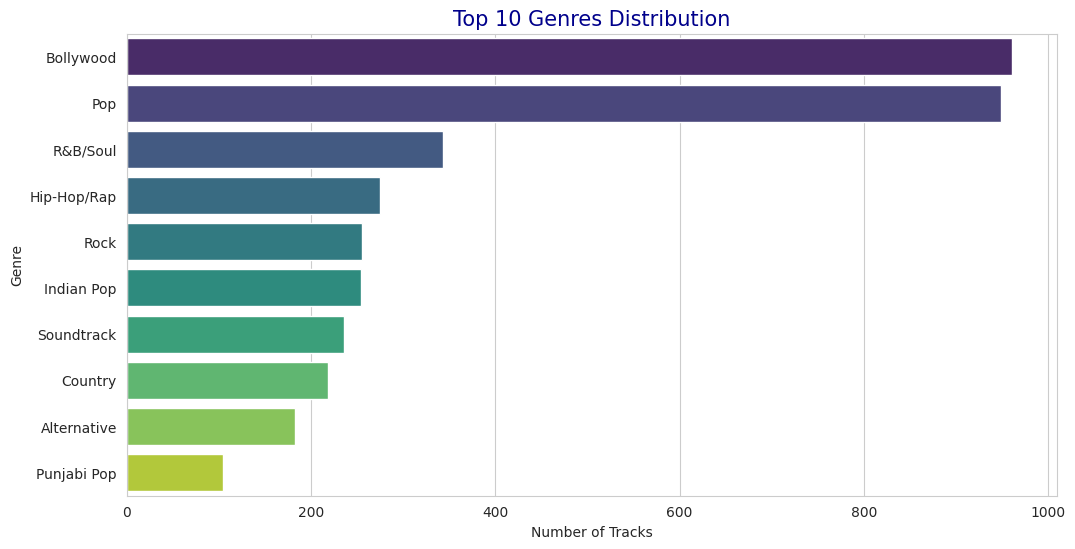

In [12]:
plt.figure(figsize=(12,6))
genre_counts = df['genre'].value_counts().head(10)

sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    palette="viridis"
)

plt.title("Top 10 Genres Distribution", fontsize=15, color='darkblue')
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.show()

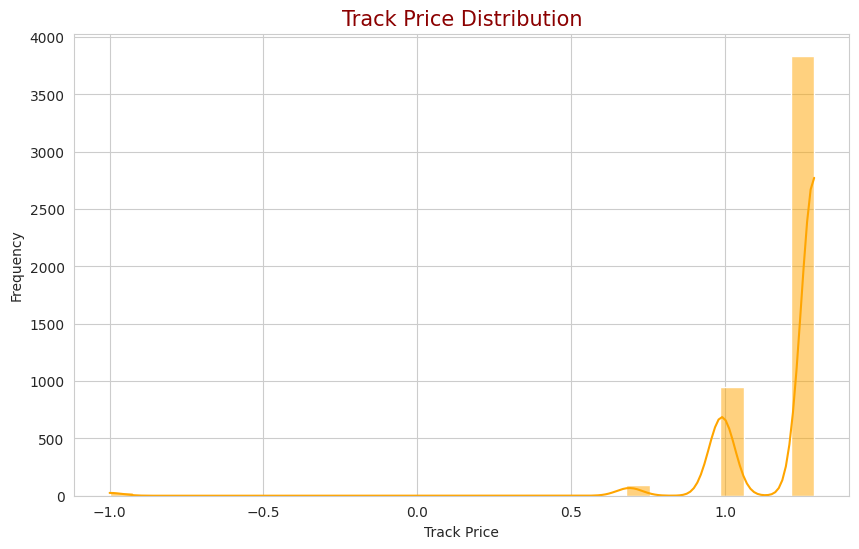

In [13]:
plt.figure(figsize=(10,6))

sns.histplot(
    df['track_price'],
    bins=30,
    kde=True,
    color="orange"
)

plt.title("Track Price Distribution", fontsize=15, color='darkred')
plt.xlabel("Track Price")
plt.ylabel("Frequency")
plt.show()

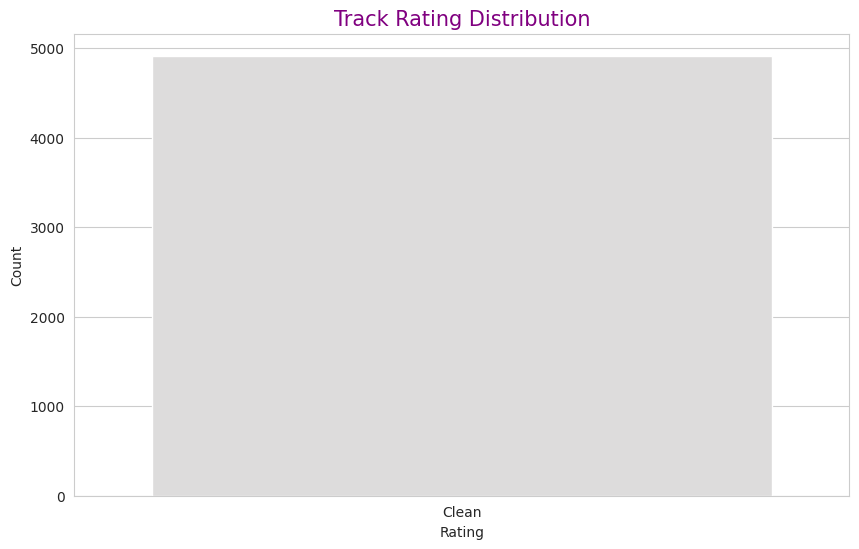

In [14]:
plt.figure(figsize=(10,6))

sns.countplot(
    x='rating',
    data=df,
    palette="coolwarm"
)

plt.title("Track Rating Distribution", fontsize=15, color='purple')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

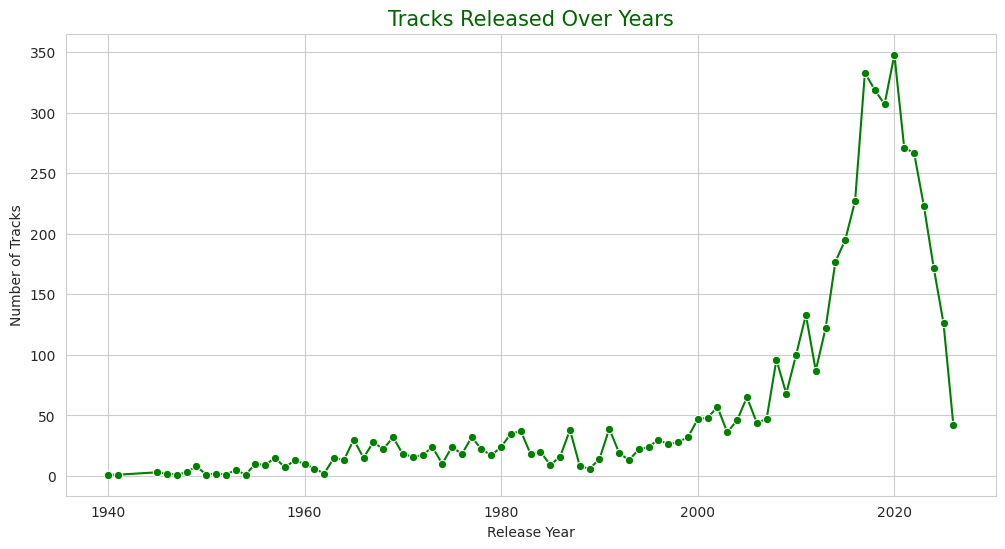

In [15]:
plt.figure(figsize=(12,6))

year_counts = df['release_year'].value_counts().sort_index()

sns.lineplot(
    x=year_counts.index,
    y=year_counts.values,
    color="green",
    marker="o"
)

plt.title("Tracks Released Over Years", fontsize=15, color='darkgreen')
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.show()

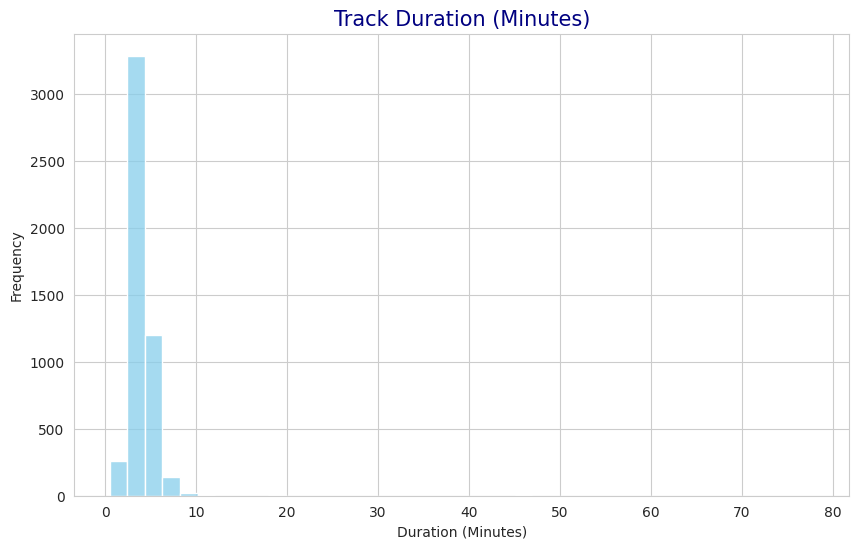

In [16]:
plt.figure(figsize=(10,6))

sns.histplot(
    df['track_duration_min'],
    bins=40,
    color="skyblue"
)

plt.title("Track Duration (Minutes)", fontsize=15, color='navy')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

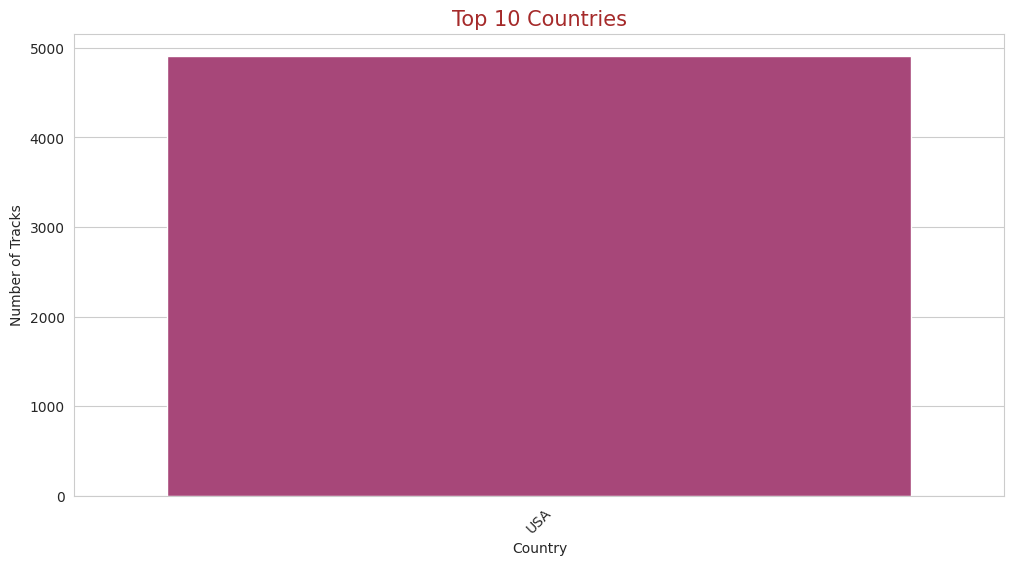

In [17]:
plt.figure(figsize=(12,6))

country_counts = df['country'].value_counts().head(10)

sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    palette="magma"
)

plt.title("Top 10 Countries", fontsize=15, color='brown')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Tracks")
plt.show()

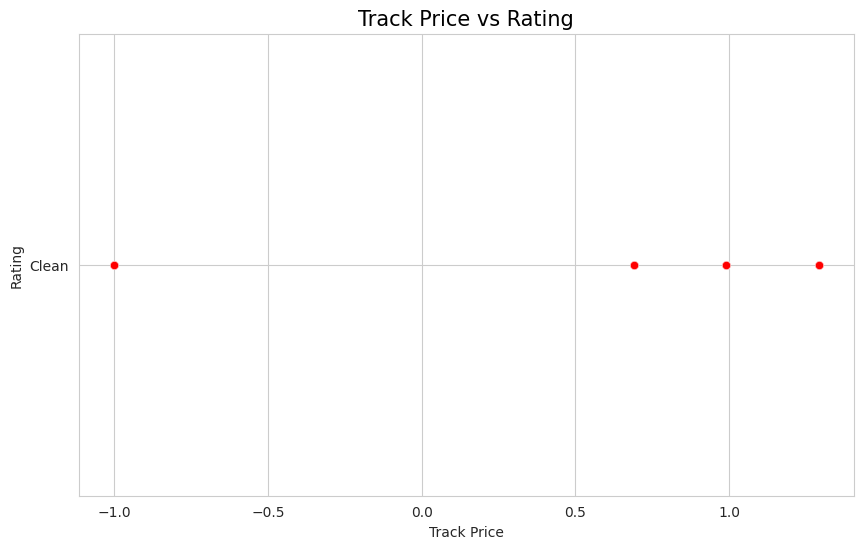

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='track_price',
    y='rating',
    data=df,
    color="red",
    alpha=0.6
)

plt.title("Track Price vs Rating", fontsize=15, color='black')
plt.xlabel("Track Price")
plt.ylabel("Rating")
plt.show()

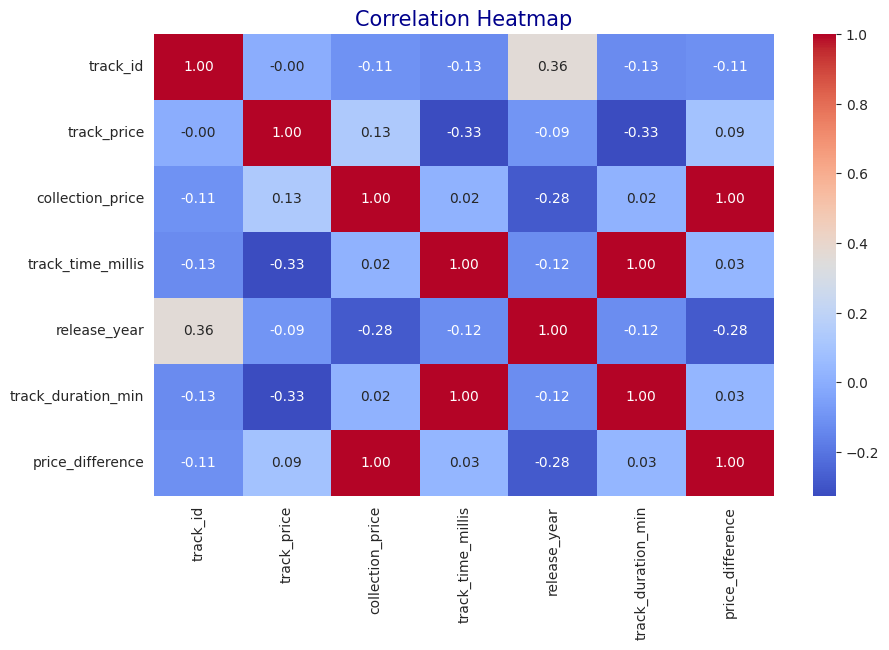

In [19]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap", fontsize=15, color='darkblue')
plt.show()

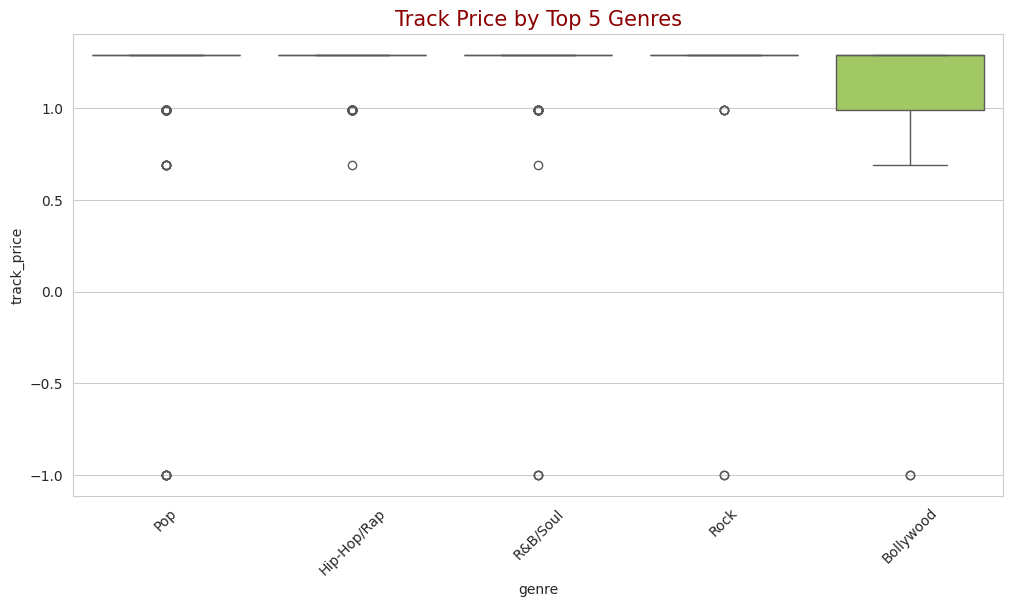

In [20]:
top_genres = df['genre'].value_counts().head(5).index
filtered_df = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(12,6))

sns.boxplot(
    x='genre',
    y='track_price',
    data=filtered_df,
    palette="Set2"
)

plt.title("Track Price by Top 5 Genres", fontsize=15, color='darkred')
plt.xticks(rotation=45)
plt.show()